In [253]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft

def windowDefault(N):
    return lambda x: 1 if abs(x) < N else 0

def windowHanna(N):
    return lambda n: 0.5 * (1 - np.cos( 2*np.pi * n / (N)))

def sins(a0,w0,a1,w1):
    return lambda x: a0 * np.sin(w0 * x) + a1 * np.sin(w1 * x)

def mult(f1, f2):
    return lambda x: f1(x) * f2(x)

def figure():
    plt.figure(figsize=(20, 6))

def draw(arr, range):
    plt.plot(range, arr)

def drawFFT(arr):
    plt.plot([*arr[len(arr)//2:], *arr[:len(arr)//2]])

def show():
    plt.show()

rg = 2*np.pi
rng = np.linspace(-rg, rg, 200)
a0 = 1
w0 = 5.1
a1 = 0.002
w1 = 25.5

def applyWindow(arr, window):
    return [ window(arr.shape[0])(i) * arr[i] for i in range(arr.shape[0])]

# Function

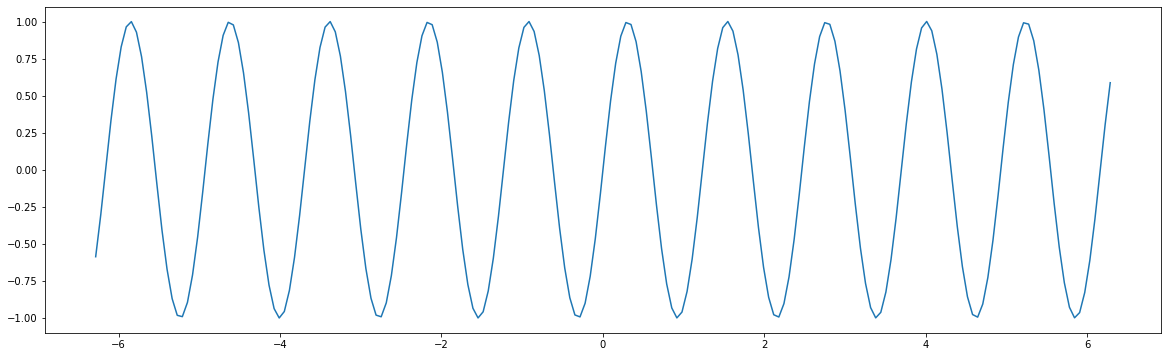

In [254]:
func = np.vectorize(sins(a0,w0,a1,w1))
funcArr = func(rng)
figure()
draw(funcArr, rng)
show()

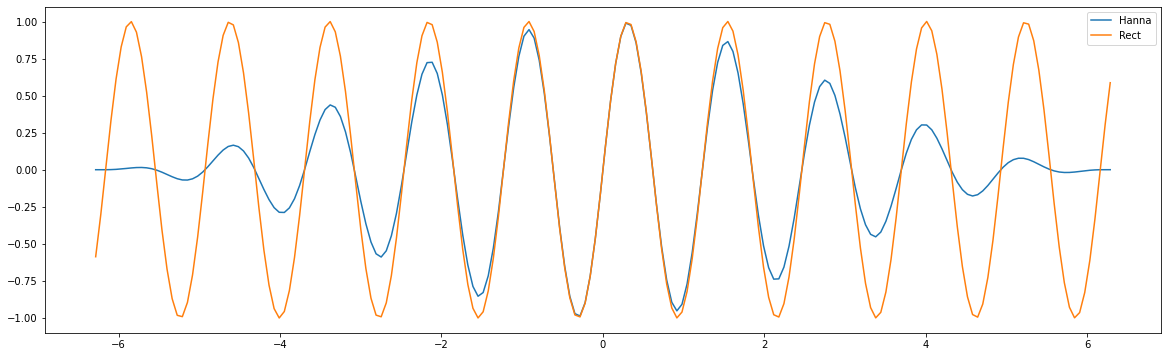

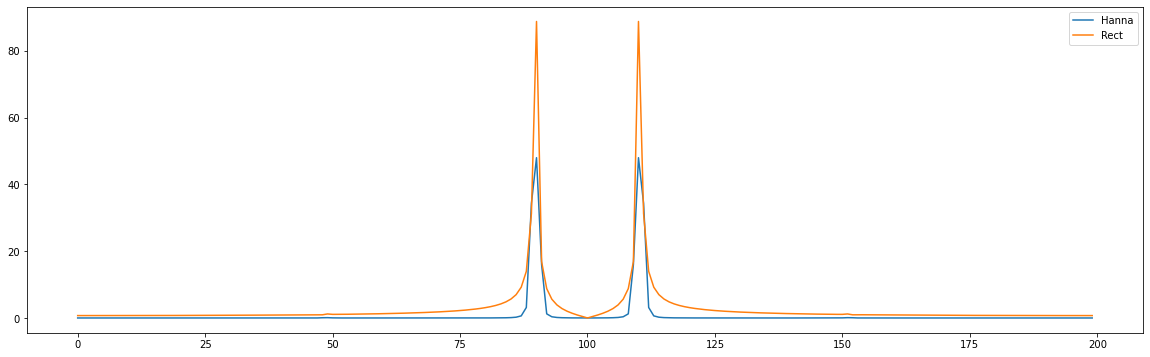

In [255]:
sinRect = applyWindow(funcArr, windowDefault)
sinRectWindowFFT = fft(sinRect)

sinHanna = applyWindow(funcArr, windowHanna)
sinHannaWindowFFT = fft(sinHanna)

figure()
draw(sinHanna, rng)
draw(sinRect, rng)
plt.legend(["Hanna", "Rect"])
show()

figure()
drawFFT(np.abs(sinHannaWindowFFT))
drawFFT(np.abs(sinRectWindowFFT))
plt.legend(["Hanna", "Rect"])
show()